In [1]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#first look at DF
df = pd.read_excel('Data/Immigration_data_by_Region/Asian_Immigration.xlsx')
df.head()

,Decade_beginning,China,Hong Kong,India,Iran,Israel,Japan,Jordan,Korea,Philippines,Syria,Taiwan,Turkey,Vietnam,Other Asia,Total Asia
0,1820,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,3.0,34.0
1,1830,8.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,55.0
2,1840,32.0,0.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,4.0,121.0
3,1850,35933.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,11.0,36080.0
4,1860,54028.0,0.0,50.0,4.0,0.0,138.0,0.0,0.0,0.0,2.0,0.0,129.0,0.0,57.0,54408.0


In [3]:
#all_regions listing of every excel file to be used for charting by region
all_regions = ['Total_immigration_by_decade','African_Immigration','Asian_Immigration','Caribbean_Immigration',
               'Central_Am_Immigration','European_Immigration','Oceania_Immigration','South_Am_Immigration'] 
#not including Not_Spec_Immigration' 

#all_data listing to be used for charting by country within region
all_data = ['African_Immigration','Asian_Immigration','Caribbean_Immigration','Central_Am_Immigration',
            'European_Immigration','Oceania_Immigration',
            'South_Am_Immigration'] #not including 'Total_immigration_by_decade' or Not_Spec_Immigration',

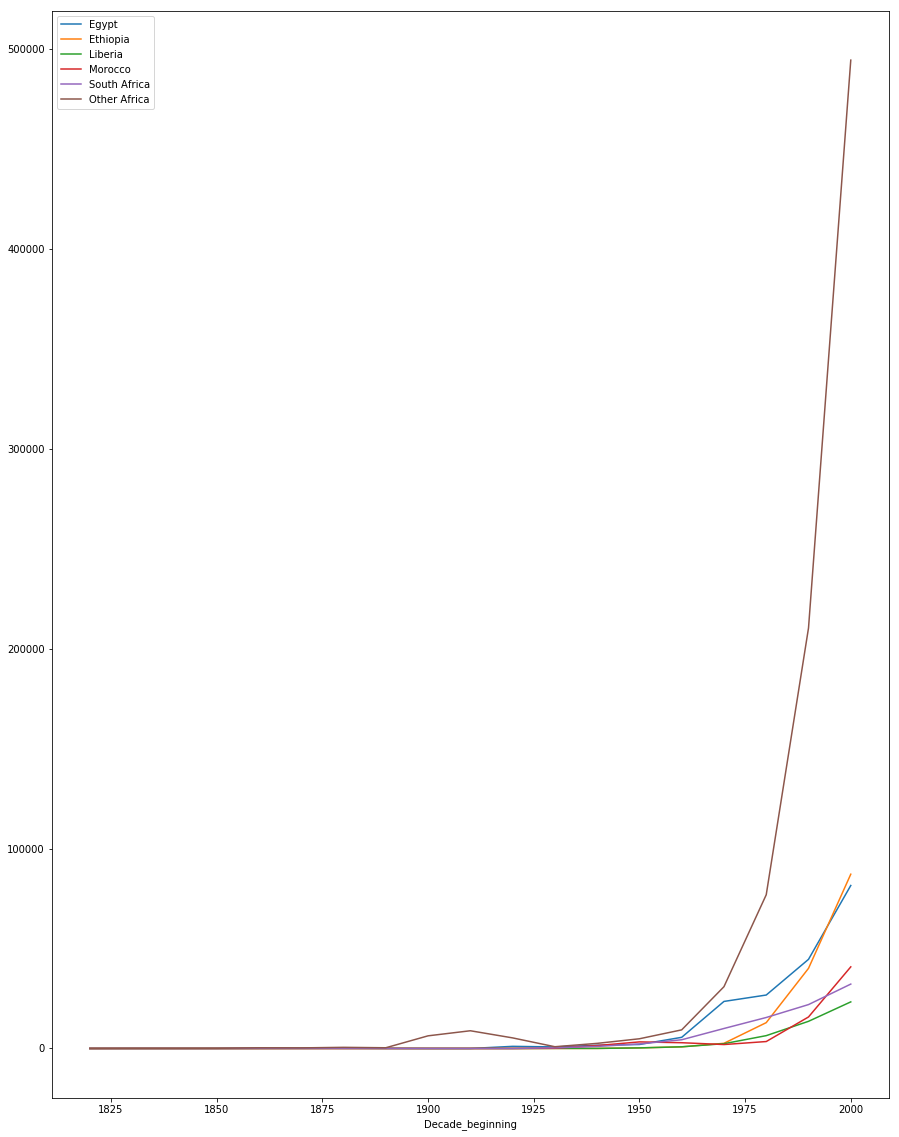

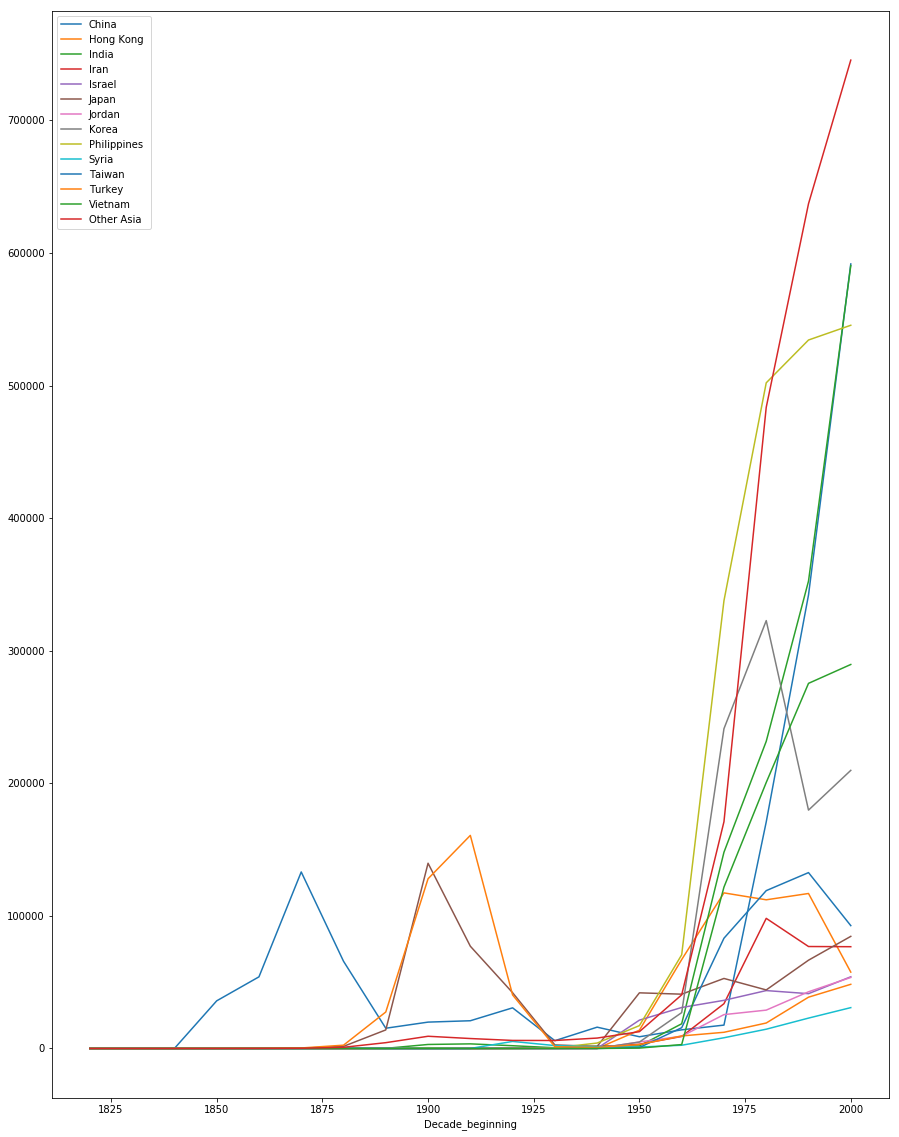

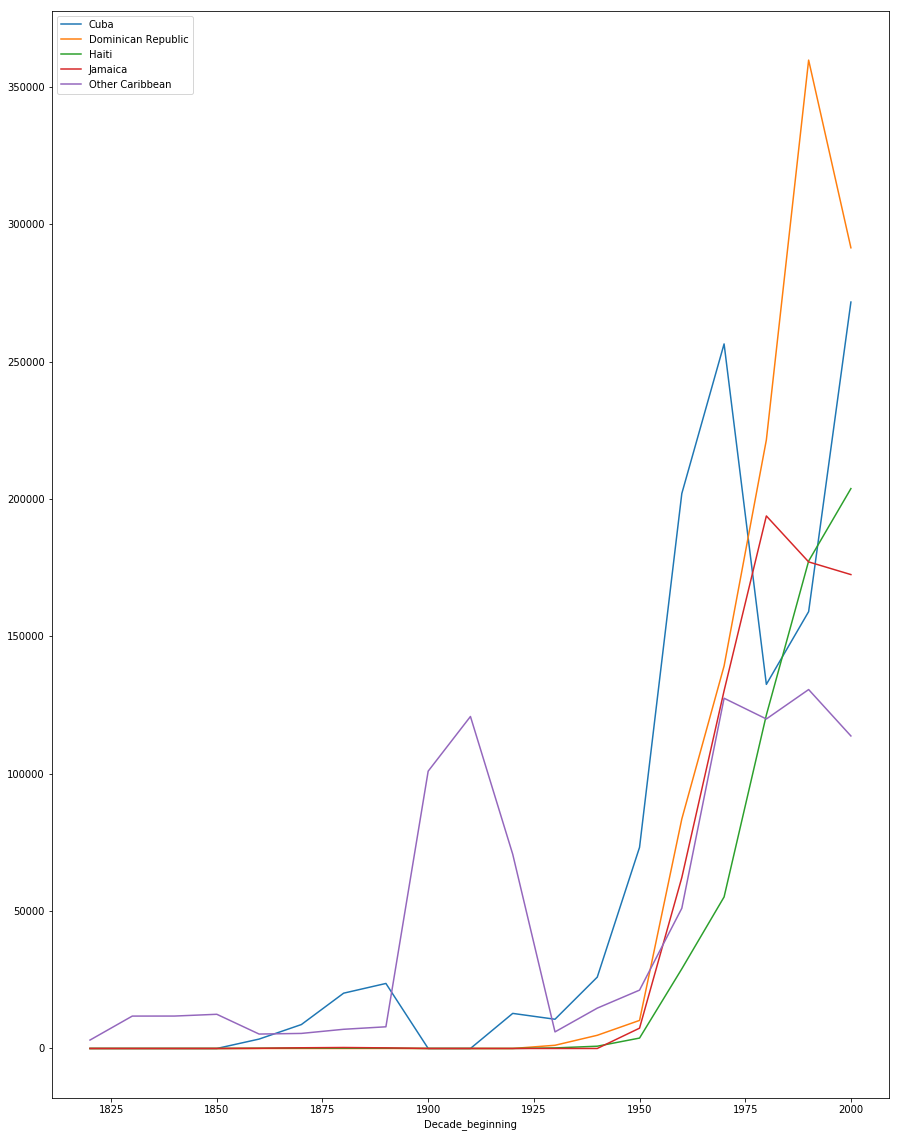

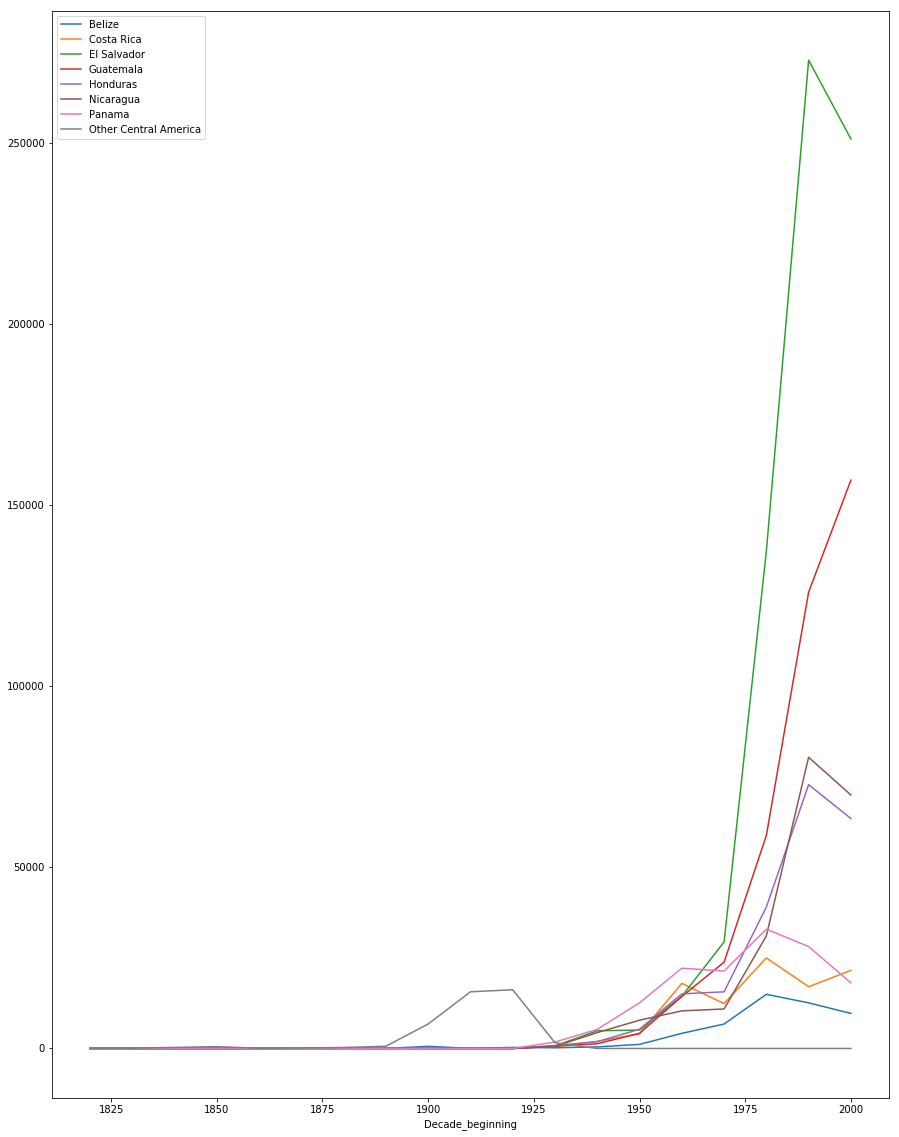

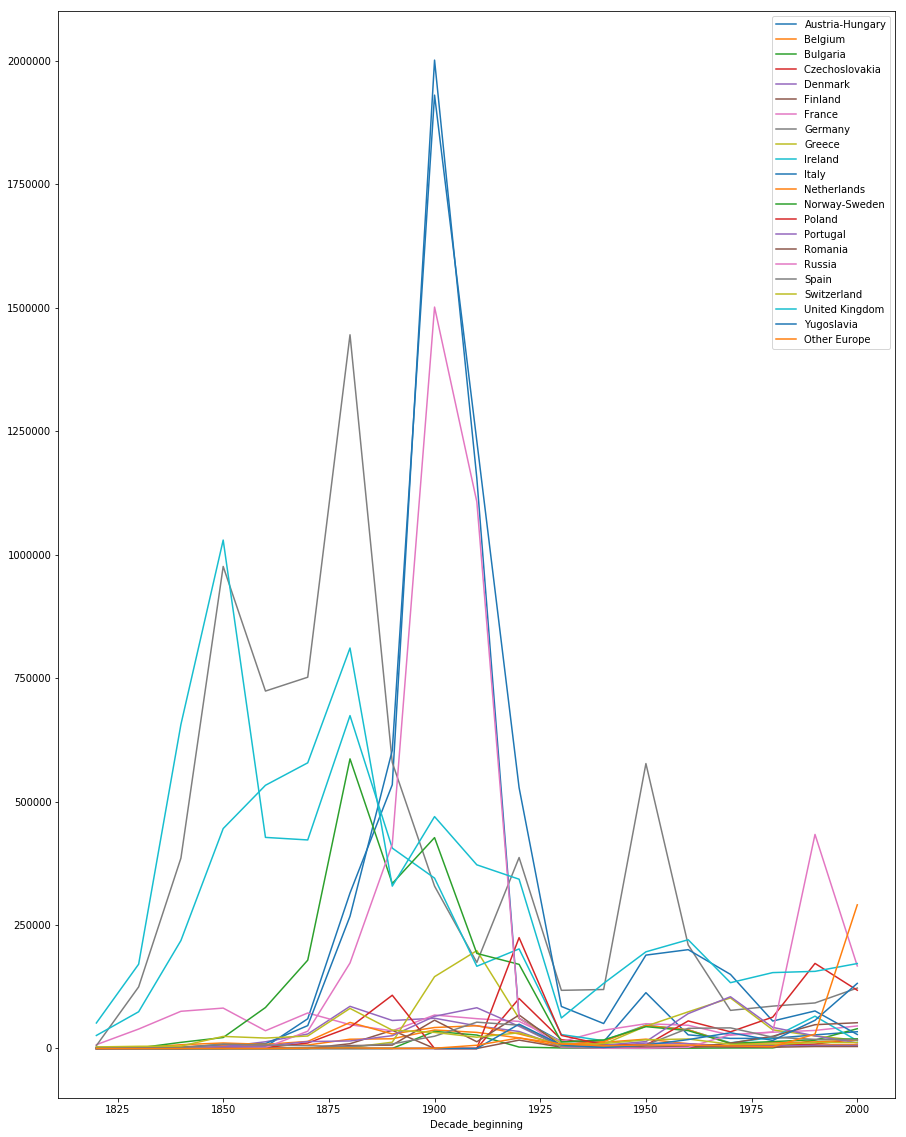

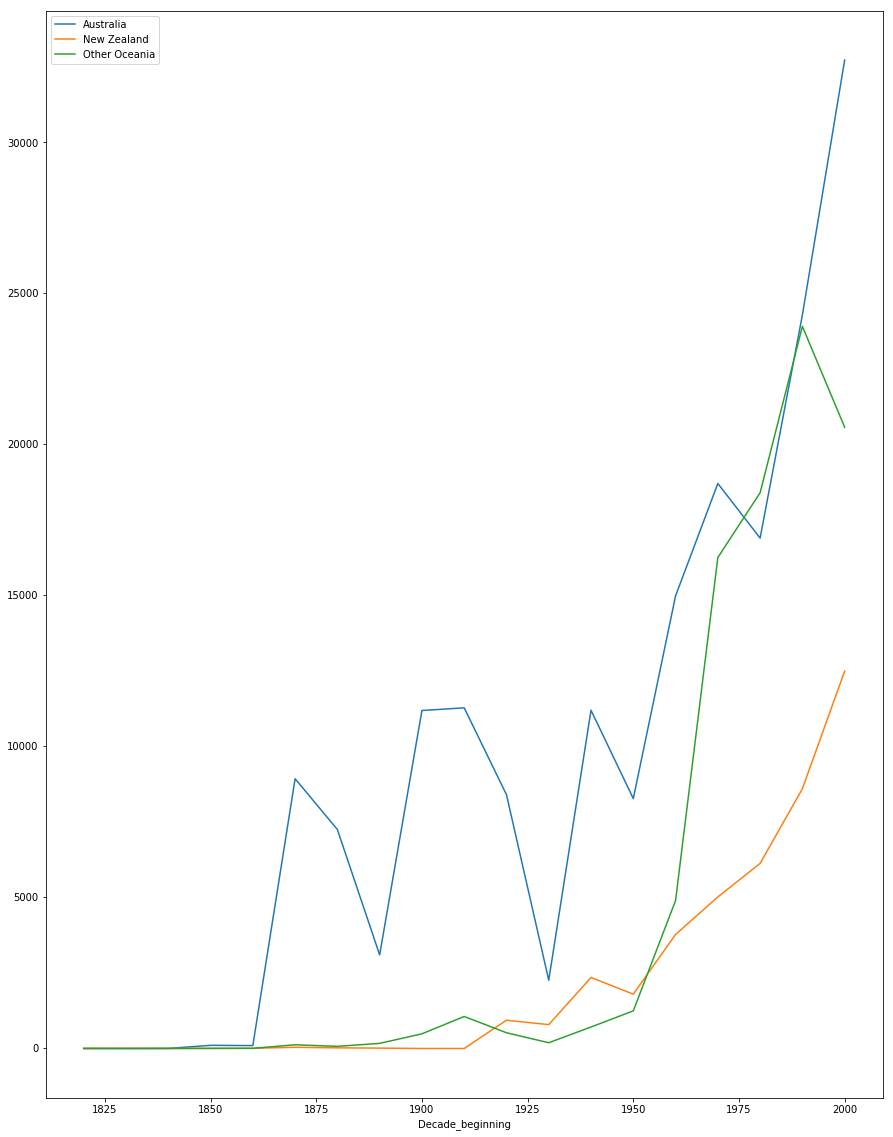

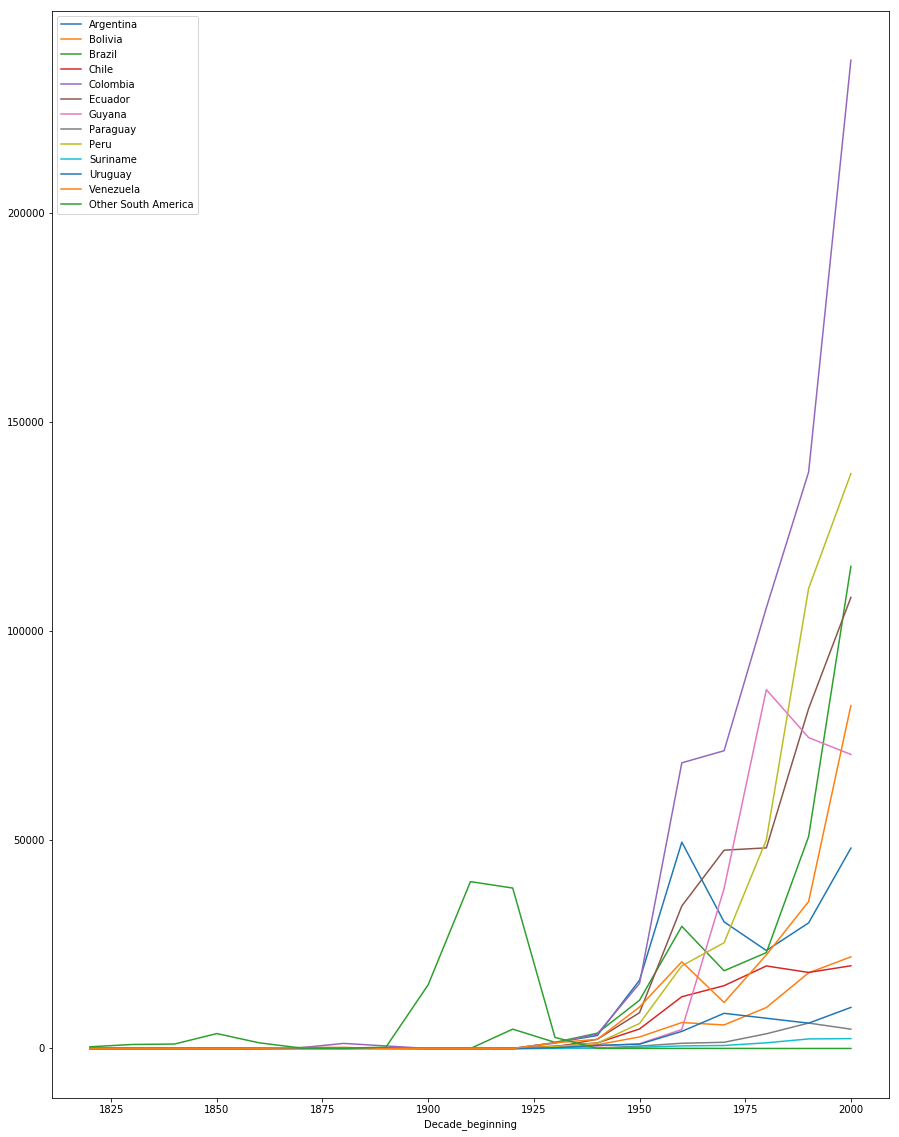

In [4]:
for file in all_data:
    file_df = pd.read_excel('Data/Immigration_data_by_Region/'+file+'.xlsx') #convert every file to df
    file_df = file_df.drop(file_df.index[19:39]) #drop the latest individual years(just keep immigration by decade)
    file_df = file_df.iloc[:, :-1] #remove total asian immigration, etc for every df
    file_df.set_index('Decade_beginning', inplace = True) #set index ad decade beginning
    file_df.plot(figsize = (15,20)) #plot every region

In [5]:
appended_data = []
for region in all_regions:
    region_df = pd.read_excel('Data/Immigration_data_by_Region/'+region+'.xlsx') #convert every file to df
    region_df = region_df.drop(region_df.index[19:39])#drop the latest individual years(just keep immigration by decade)
    region_df.set_index('Decade_beginning', inplace = True) #set index as decade beginning
    region_df = region_df.iloc[:,-1] #just keep totals by region to join dfs later
    region_df = region_df.to_frame() #convert to df(previously were pandas series)
    regions = region_df.rename(columns={region_df.columns[-1]: region }) #rename the total columns as that region's name
    appended_data.append(regions) #append all data to list
    regions = pd.concat(appended_data, axis=1, join='inner') #concatenate all dfs to make one large df
    

In [6]:
#check that they joined correctly
regions

,Total_immigration_by_decade,African_Immigration,Asian_Immigration,Caribbean_Immigration,Central_Am_Immigration,European_Immigration,Oceania_Immigration,South_Am_Immigration
Decade_beginning,,,,,,,,
1820,128502,19.0,34.0,3061.0,57.0,99618.0,2.0,405.0
1830,538381,66.0,55.0,11792.0,94.0,422853.0,1.0,957.0
1840,1427337,67.0,121.0,11803.0,297.0,1369423.0,3.0,1062.0
1850,2814554,104.0,36080.0,12447.0,512.0,2622617.0,110.0,3569.0
1860,2081261,458.0,54408.0,8809.0,70.0,1880389.0,107.0,1536.0
1870,2742137,441.0,134071.0,14592.0,202.0,2252050.0,9094.0,1109.0
1880,5248568,768.0,71152.0,27600.0,359.0,4638684.0,7341.0,1954.0
1890,3694294,432.0,61304.0,31885.0,674.0,3576411.0,3279.0,1389.0
1900,8202388,6326.0,300441.0,100960.0,7341.0,7572569.0,11677.0,15253.0


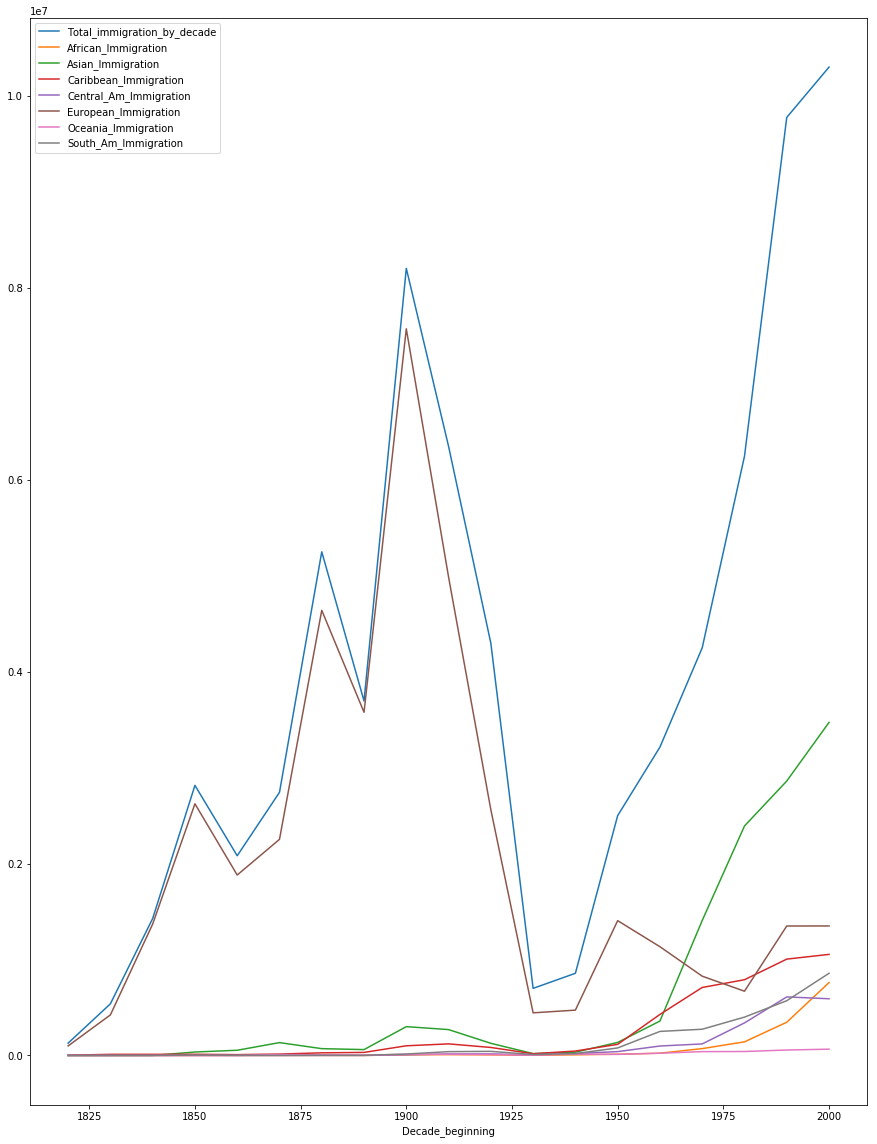

In [7]:
regions.plot(figsize = (15,20))